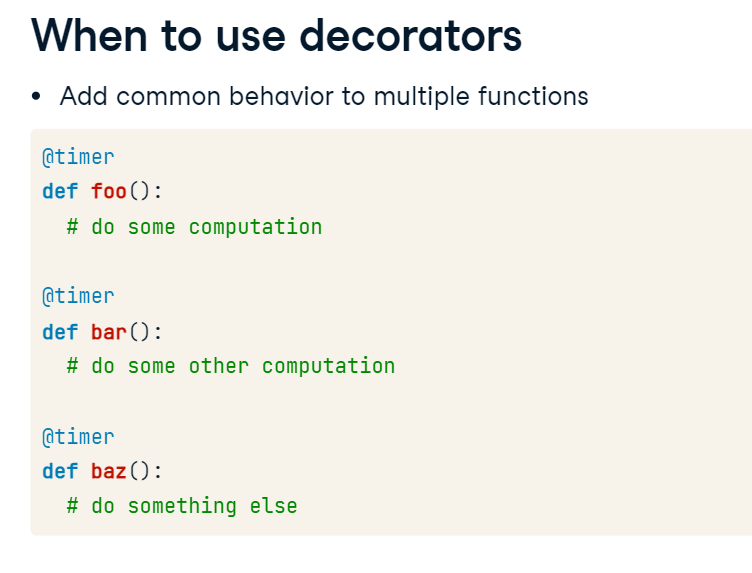

## Print the return type

In [ ]:
def print_return_type(func):
  # Define wrapper(), the decorated function
  def wrapper(*args, **kwargs):
    # Call the function being decorated
    result = func(*args, **kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result
  # Return the decorated function
  return wrapper
  
@print_return_type
def foo(value):
  return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))

## Counter

In [ ]:
def counter(func):
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    return func(*args, **kwargs)
  # Set count to 0 to initialize call count for each new decorated function
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter() decorator
@counter
def foo():
  print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

## Preserving docstrings when decorating functions

In [ ]:
from functools import wraps

def add_hello(func):
  # Decorate wrapper() so that it keeps func()'s metadata
  @wraps(func)
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

## Measuring decorator overhead

In [ ]:
@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

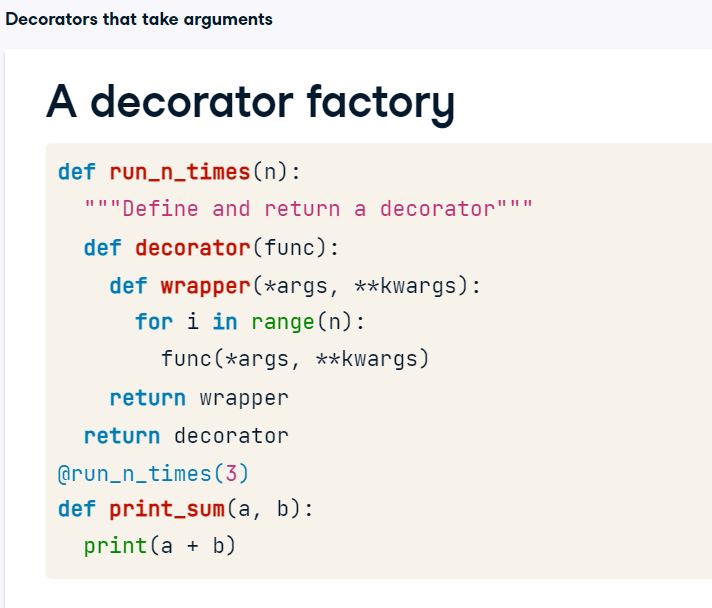

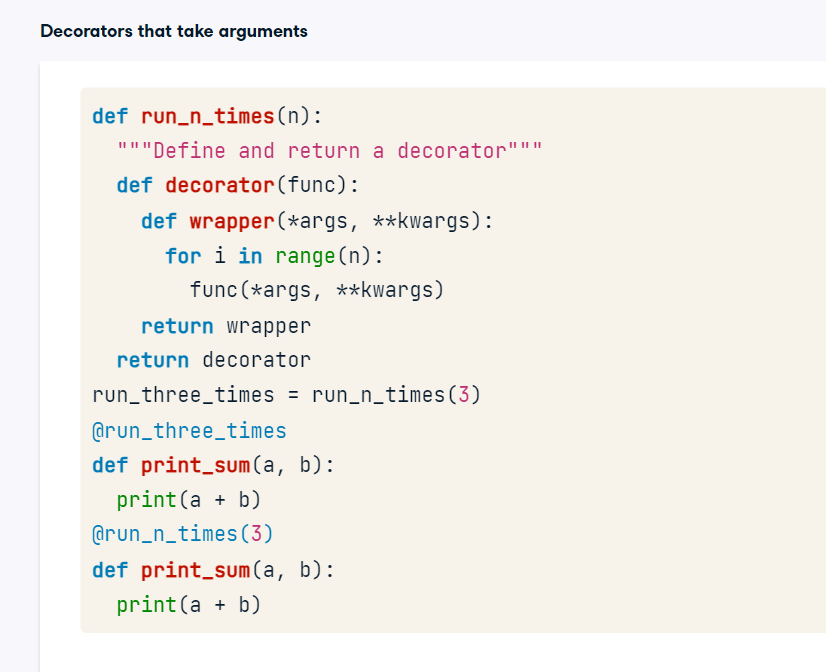

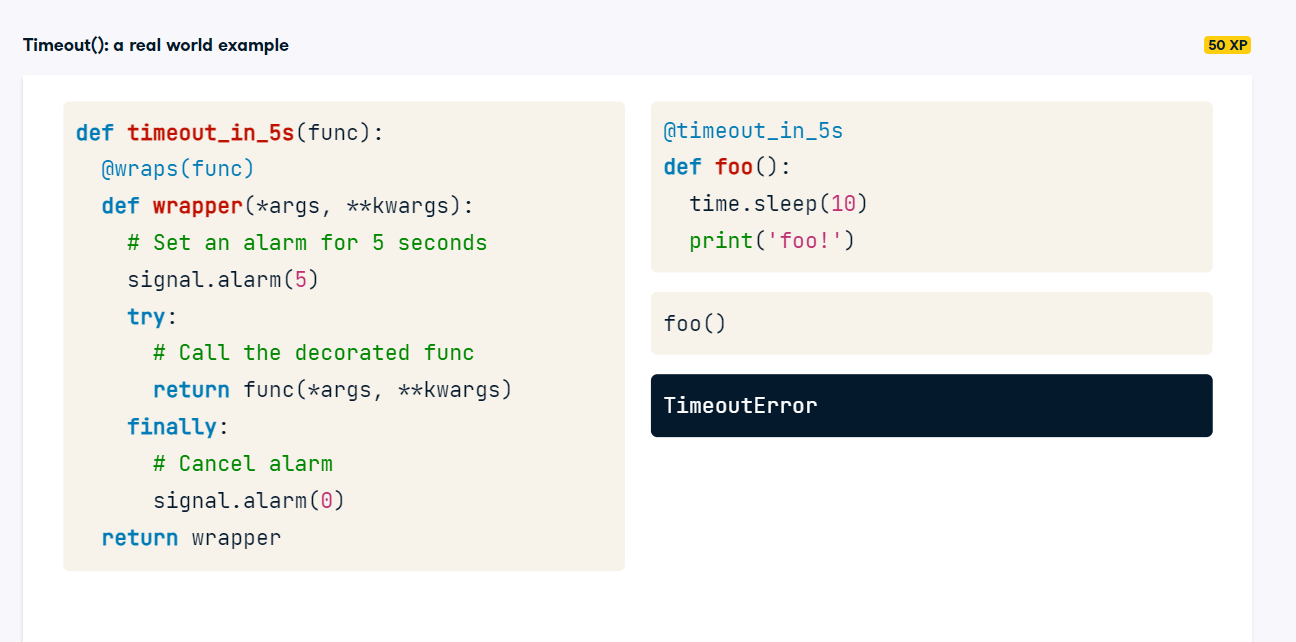



In [ ]:
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwargs)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator
  
@tag('test', 'this is a tag')
def foo():
  pass

print(foo.tags)

## Check the return type

In [ ]:
def returns(return_type):
  # Complete the returns() decorator
  def decorator(func):
    def wrapper(*args, **kwargs):
      result = func(*args, **kwargs)
      assert type(result) == return_type
      return result
    return wrapper
  return decorator
  
@returns(dict)
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')